# SPI download and visualization
*Dr Jan Verkade, January 2024*  
*(below Python code is part based on code written by Maarten Verbrugge at Deltares)*

In this tutorial, we will download and visualize SPI data from the Global Drought Observatory (GDO). You will need to manually download the data from the GDO web portal.

Access the GDO web portal's download section through https://edo.jrc.ec.europa.eu/gdo/php/index.php?id=2112. Here, you'll see various headers that allow you to select your data:

* **Download dataset covering**: depending on your visualization requirement, select either 'World' or 'Europe'.  
* **Product**: as the present tutorial is about SPI, pick any Standardized Precipitation Index product. The products vary in the accumulation period, from 1-month to 48-months.  
* **Years**: select your year of interest.  
* **Format**: for the present tutorial, select NetCDF

Once your selection is made, click the Download button. Your data will be downloaded to your workstation's default download location.

In [1]:
## import packages
import matplotlib.pyplot as plt
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

Locate your downloaded netCDF (.nc) file and change below code snippet to ensure it refers to that file.

In [2]:
file_name = '/home/jan/tmp/glofas/spg01_m_wld_20230101_20231201_m.nc'
file_name = f'./spg01_m_wld_20230101_20231201_m.nc'

In below snippet, the plot extent is set. Some useful plot extents (West, East, South, North) include:
* Africa: [-30, 80, -40, 40]
* Madagascar: [45, 52,-26, -10]
* Kenya: [33.5, 42.5, -5, 5]
* Côte d'Ivoire: [-9, -2, 4, 11]
* World: [-180, 180, -90, 90]

In [3]:
plot_extent = [-30, 80, -40, 40]

Also, we set the plot time. Make sure this is included in the data you downloaded!

In [4]:
plot_time = '2023-11-01' #YYYY-MM-DD

We set the color scales to those commonly used for plotting SPI:

In [5]:
cols = [[1, 0.023, 0.004], [1, 0.666, 0], [1, 1, 0], [1, 1, 1], [0.914, 0.8, 0.976], [0.686, 0.326, 0.769], [0.471, 0.004,0.471] ] ## Get RGB values of colours from GDO
ls_cols = colors.ListedColormap(cols)
bounds = [-100, -2, -1.5, -1, 1, 1.5, 2, 100] ## Arbitrarily pick large outer values
norm = colors.BoundaryNorm(bounds, ls_cols.N)
ls_cols.set_bad(color = 'lightgrey') ## Give NaN values a colour

We then open our file:

In [7]:
data = xr.load_dataset(file_name)
ds = data.sel({'lon': slice(plot_extent[0], plot_extent[1]), 'lat': slice(plot_extent[2],plot_extent[3])})

and subsequently plot the SPI values. Note that if you have selected another accumulation period than 1 month, you have to change the `spg01` string accordingly.

Text(0.5, 1.0, 'SPI values at 2023-11-01')

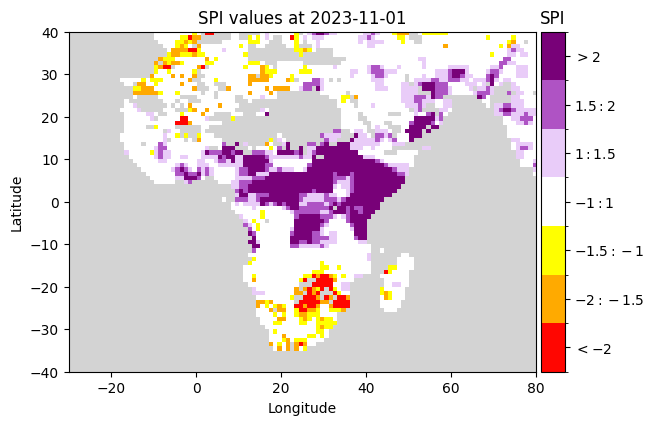

In [8]:
im1 = plt.imshow(ds['spg01'].sel({'time': plot_time}), extent = plot_extent, cmap= ls_cols, norm = norm, origin = 'lower')

## Set colorbar
div = make_axes_locatable(im1.axes)
cax = div.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(im1, cax=cax, orientation='vertical')

## Set labels
cbar.set_ticks([-51,-1.75,-1.25,0,1.25,1.75,51], labels = ['$<-2$', '$-2 : -1.5$', '$-1.5 : -1$', '$-1 : 1$', '$1 : 1.5$', '$1.5 : 2$', '$>2$'])
cbar.ax.set_title('SPI')
im1.axes.set_xlabel('Longitude')
im1.axes.set_ylabel('Latitude')
im1.axes.set_title('SPI values at ' + plot_time)